<a href="https://colab.research.google.com/github/Trrunghau/Trrunghau/blob/homework/Fuzzy_TIPPING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=fd52591c17ed04a86c5a3d237a77097307fa729652df1b2f3153b4cc96482fc8
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


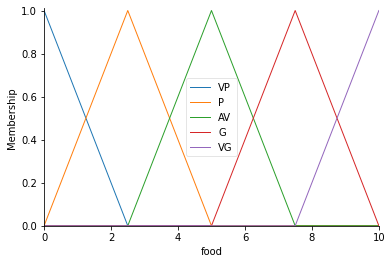

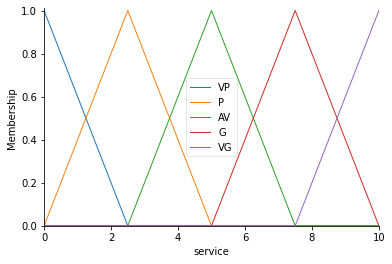

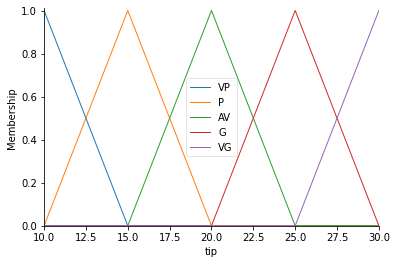

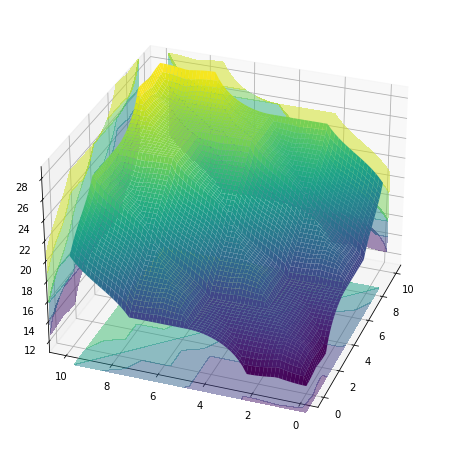

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
universe = np.linspace(0,10,61)
universe1 = np.linspace(10,30,61)
food = ctrl.Antecedent(universe,'food')
service = ctrl.Antecedent(universe,'service')
tip = ctrl.Consequent(universe1,'tip')
names = ['VP','P','AV','G','VG']
food.automf(names=names)
service.automf(names=names)
tip.automf(names=names)

rule0 = ctrl.Rule(antecedent = ((food['VP']&service['VP'])|(food['VP']&service['P'])|(food['P']&service['VP'])),consequent = tip['VP'])

rule1 = ctrl.Rule(antecedent = ((food['AV']&service['VP'])|(food['AV']&service['P'])|(food['P']&service['P'])|(food['P']&service['AV'])|
                                (food['VP']&service['AV'])|(food['G']&service['VP'])|(food['VP']&service['G'])),consequent = tip['P'])

rule2 = ctrl.Rule(antecedent = ((food['VG']&service['VP'])|(food['G']&service['P'])|(food['AV']&service['AV'])|(food['P']&service['G'])|
                                (food['VP']&service['VG'])),consequent = tip['AV'])

rule3 = ctrl.Rule(antecedent = ((food['VG']&service['AV'])|(food['G']&service['AV'])|(food['G']&service['G'])|(food['AV']&service['G'])|
                                (food['AV']&service['VG'])|(food['VG']&service['P'])|(food['P']&service['VG'])),consequent = tip['G'])

rule4 = ctrl.Rule(antecedent = ((food['VG']&service['VG'])|(food['VG']&service['G'])|(food['G']&service['VG'])),consequent = tip['VG'])

food.view()
service.view()
tip.view()

system = ctrl.ControlSystem(rules=[rule0,rule1,rule2,rule3,rule4])
sim = ctrl.ControlSystemSimulation(system,flush_after_run=61*61+1)
upsample = np.linspace(0,10,61)
x,y = np.meshgrid(upsample,upsample)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['food'] = x[i,j]
    sim.input['service'] = y[i,j]
    sim.compute()
    z[i,j]=sim.output['tip']
    
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x,y,z,rstride = 1,cstride=1,cmap='viridis',linewidth=0.4,antialiased = True)
cset =ax.contourf(x,y,z,zdir ='z',offset = 9, cmap = 'viridis',alpha = 0.5)
cset =ax.contourf(x,y,z,zdir ='x',offset = 11, cmap = 'viridis',alpha = 0.5)
cset =ax.contourf(x,y,z,zdir ='y',offset = 11, cmap = 'viridis',alpha = 0.5)
ax.view_init(30,200)